In [1]:
import pandas as pd

In [2]:
df_inat = pd.read_csv('../data/gbif/occurrence.txt', delimiter='\t', quotechar='"')

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_41606/3809163833.py:1: DtypeWarning: Columns (100,108,110,111,112,114,115,118,121,128,130,136,138,139,140,141,150,152,153,154,156,157,158,159,160,161,162,163,164,165,166,168,169,171,178,180,189,190,191,204,208,211,212,214,215,219,228,229,247,255,256) have mixed types. Specify dtype option on import or set low_memory=False.
  df_inat = pd.read_csv('../data/gbif/occurrence.txt', delimiter='\t', quotechar='"')


In [3]:
df_eBird = pd.read_csv('../data/eBird/ebd_US-CA_201901_201912_relApr-2023/ebd_US-CA_201901_201912_relApr-2023.txt', sep='\t')

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_41606/142200405.py:1: DtypeWarning: Columns (9,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_eBird = pd.read_csv('../data/eBird/ebd_US-CA_201901_201912_relApr-2023/ebd_US-CA_201901_201912_relApr-2023.txt', sep='\t')


In [31]:
df_inat.shape

(3321454, 259)

In [32]:
df_eBird.shape

(8694926, 50)

In [4]:
rel_columns_iNat = [
    'taxonID',
    'taxonKey',
    'countryCode',
    'stateProvince',
    'decimalLatitude',
    'decimalLongitude',
    'eventDate',
]
rel_columns_eBird = [
    'TAXON CONCEPT ID',
    'OBSERVATION COUNT',
    'COUNTRY',
    'STATE',
    'LATITUDE',
    'LONGITUDE',
    'OBSERVATION DATE',
]

In [5]:
df_iNat2 = df_inat[rel_columns_iNat].copy()
df_eBird2 = df_eBird[rel_columns_eBird].copy()

In [6]:
df_iNat2.head()

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate
0,123045,2515238.0,US,California,34.140209,-119.187897,2019-01-30T09:59:56
1,84994,5156078.0,US,Florida,28.059126,-82.418194,2019-01-21T14:35:00
2,36204,2451234.0,US,California,35.271399,-120.888941,2019-03-17T13:56:00
3,53326,3169708.0,US,Georgia,33.769633,-84.30645,2019-03-29T14:33:23
4,9176,5231132.0,US,Texas,33.562034,-101.809798,2019-04-02T12:44:00


In [8]:
df_iNat2['countryCode'].value_counts()

US    3321452
Name: countryCode, dtype: int64

# eBird Analysis

In [10]:
df_eBird2['COUNTRY'].value_counts()

United States    8694926
Name: COUNTRY, dtype: int64

In [11]:
df_eBird2['STATE'].value_counts()

California    8694926
Name: STATE, dtype: int64

In [12]:
df_eBird2.head()

,TAXON CONCEPT ID,OBSERVATION COUNT,COUNTRY,STATE,LATITUDE,LONGITUDE,OBSERVATION DATE
0,avibase-CA08045E,1,United States,California,37.892331,-122.311800,2019-01-13
1,avibase-CA08045E,X,United States,California,37.871270,-122.307890,2019-01-01
2,avibase-CA08045E,1,United States,California,37.834029,-122.238747,2019-01-25
3,avibase-CA08045E,1,United States,California,37.695328,-121.844741,2019-01-10
4,avibase-CA08045E,1,United States,California,37.834029,-122.238747,2019-01-25


In [13]:
df_eBird2['AVIBASEID'] = df_eBird2['TAXON CONCEPT ID'].apply(lambda x : x[-8:])

In [34]:
df_eBird2

,TAXON CONCEPT ID,OBSERVATION COUNT,COUNTRY,STATE,LATITUDE,LONGITUDE,OBSERVATION DATE,AVIBASEID
0,avibase-CA08045E,1,United States,California,37.892331,-122.311800,2019-01-13,CA08045E
1,avibase-CA08045E,X,United States,California,37.871270,-122.307890,2019-01-01,CA08045E
2,avibase-CA08045E,1,United States,California,37.834029,-122.238747,2019-01-25,CA08045E
3,avibase-CA08045E,1,United States,California,37.695328,-121.844741,2019-01-10,CA08045E
4,avibase-CA08045E,1,United States,California,37.834029,-122.238747,2019-01-25,CA08045E
...,...,...,...,...,...,...,...,...
8694921,avibase-BC5A9498,13,United States,California,39.427357,-121.130547,2019-12-26,BC5A9498
8694922,avibase-BC5A9498,4,United States,California,39.189706,-121.593404,2019-12-19,BC5A9498
8694923,avibase-BC5A9498,4,United States,California,39.264460,-121.602397,2019-12-19,BC5A9498
8694924,avibase-BC5A9498,4,United States,California,39.264460,-121.602397,2019-12-19,BC5A9498


In [29]:
df_eBird_median_by_species = df_eBird2[df_eBird2['OBSERVATION COUNT']!='X'].groupby('AVIBASEID')['OBSERVATION COUNT'].median().to_dict()

In [38]:
df_eBird2['OBSCOUNT'] = df_eBird2[['AVIBASEID','OBSERVATION COUNT']].apply(
    lambda row: (df_eBird_median_by_species[row['AVIBASEID']] if row['AVIBASEID'] in df_eBird_median_by_species else 1) if row['OBSERVATION COUNT'] == 'X' else row['OBSERVATION COUNT'],
    axis=1
)

In [41]:
df_eBird2.shape

(8694926, 9)

In [43]:
df_eBird2['OBSCOUNT'] = df_eBird2['OBSCOUNT'].astype(float)

In [44]:
df_eBird2['OBSCOUNT'].sum()

255405907.5

In [45]:
df_eBird2['AVIBASEID'].nunique()

1088

In [46]:
df_eBird3 = df_eBird2[
    (df_eBird2['LATITUDE']>=36.4701132878)
    &
    (df_eBird2['LATITUDE']<=42.009518)
    &
    (df_eBird2['LONGITUDE']>= -124.409591)
    &
    (df_eBird2['LONGITUDE']<= -114.131211)
].copy()

In [48]:
df_eBird3.shape

(5168169, 9)

In [49]:
df_eBird3['OBSCOUNT'].sum()

218303859.5

In [50]:
df_eBird3['AVIBASEID'].nunique()

918

In [51]:
df_eBird3['observation_datetime'] = pd.to_datetime(df_eBird3['OBSERVATION DATE'])

In [53]:
df_eBird3['WEEK'] = df_eBird3['observation_datetime'].dt.week

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_41606/4278245370.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_eBird3['WEEK'] = df_eBird3['observation_datetime'].dt.week


In [55]:
df_eBird3['YEAR'] = df_eBird3['observation_datetime'].dt.year

In [57]:
df_eBird3['YEAR'].value_counts()

2019    5168169
Name: YEAR, dtype: int64

# iNat Analysis

In [58]:
df_inat.shape

(3321454, 259)

In [59]:
df_iNat2.shape

(3321454, 7)

In [60]:
df_iNat2.head()

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate
0,123045,2515238.0,US,California,34.140209,-119.187897,2019-01-30T09:59:56
1,84994,5156078.0,US,Florida,28.059126,-82.418194,2019-01-21T14:35:00
2,36204,2451234.0,US,California,35.271399,-120.888941,2019-03-17T13:56:00
3,53326,3169708.0,US,Georgia,33.769633,-84.30645,2019-03-29T14:33:23
4,9176,5231132.0,US,Texas,33.562034,-101.809798,2019-04-02T12:44:00


In [61]:
df_iNat2['countryCode'].value_counts()

US    3321452
Name: countryCode, dtype: int64

In [62]:
df_iNat2['stateProvince'].value_counts()

California              717224
Texas                   491869
Florida                 182561
New York                138104
Ohio                    111734
Virginia                 88869
Massachusetts            87683
Illinois                 87369
Pennsylvania             84083
North Carolina           80368
Arizona                  77953
Oregon                   69151
Washington               67702
Maryland                 66009
New Jersey               64479
Vermont                  59887
Colorado                 57119
Michigan                 54503
Minnesota                50984
New Mexico               49280
Alabama                  45433
Tennessee                44713
Wisconsin                43611
Georgia                  34427
Louisiana                32647
Indiana                  28997
South Carolina           27786
Missouri                 26843
Kentucky                 25402
Arkansas                 24412
Oklahoma                 23415
Maine                    23354
Mississi

In [63]:
df_iNat2['observation_dt'] = pd.to_datetime(df_iNat2['eventDate'])

In [65]:
df_iNat3 = df_iNat2[df_iNat2['stateProvince'] == 'California'].copy()

In [66]:
df_iNat3

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,observation_dt
0,123045,2515238.0,US,California,34.140209,-119.187897,2019-01-30T09:59:56,2019-01-30 09:59:56
2,36204,2451234.0,US,California,35.271399,-120.888941,2019-03-17T13:56:00,2019-03-17 13:56:00
7,58088,3051417.0,US,California,33.069050,-116.601188,2019-04-18T09:14:00,2019-04-18 09:14:00
11,58976,2927694.0,US,California,39.780938,-121.730509,2019-04-28T12:28:00,2019-04-28 12:28:00
12,42391,2441119.0,US,California,33.875304,-116.10492,2019-05-02T10:44:57,2019-05-02 10:44:57
...,...,...,...,...,...,...,...,...
3321414,9535,9596413.0,US,California,34.117050,-117.965894,2019-01-04T16:42:00,2019-01-04 16:42:00
3321415,485176,2498155.0,US,California,37.582335,-122.314627,2019-02-09T07:46:00,2019-02-09 07:46:00
3321417,1061811,5955209.0,US,California,37.047745,-122.202159,2019-04-07T12:43:17,2019-04-07 12:43:17
3321449,508048,9036008.0,US,California,38.157721,-121.443274,2019-12-16T16:59:00,2019-12-16 16:59:00


In [69]:
df_iNat3['decimalLatitude'] = df_iNat3['decimalLatitude'].astype(float)

In [70]:
df_iNat3['decimalLongitude'] = df_iNat3['decimalLongitude'].astype(float)

In [71]:
df_iNat4 = df_iNat3[
    (df_iNat3['decimalLatitude']>=36.4701132878)
    &
    (df_iNat3['decimalLatitude']<=42.009518)
    &
    (df_iNat3['decimalLongitude']>= -124.409591)
    &
    (df_iNat3['decimalLongitude']<= -114.131211)
].copy()

In [72]:
df_iNat4.shape

(363386, 8)

In [74]:
df_iNat4['YEAR'] = df_iNat4['observation_dt'].dt.year
df_iNat4['WEEK'] = df_iNat4['observation_dt'].dt.week

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_41606/2813681667.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_iNat4['WEEK'] = df_iNat4['observation_dt'].dt.week


In [75]:
df_iNat4['YEAR'].value_counts()

2019    363386
Name: YEAR, dtype: int64

In [76]:
df_iNat4['taxonID'].nunique()

10757

# Merging iNat and eBird

In [77]:
df_tax_key = pd.read_csv('../data/query_taxonIDs_various.csv')

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_41606/2743186917.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tax_key = pd.read_csv('../data/query_taxonIDs_various.csv')


In [85]:
df_tax_key.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830987 entries, 0 to 830986
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   item       830987 non-null  object 
 1   iNat_Tid   830987 non-null  object 
 2   ITIS_TSN   314392 non-null  float64
 3   GBF_ID     809035 non-null  float64
 4   avibaseid  8795 non-null    object 
dtypes: float64(2), object(3)
memory usage: 31.7+ MB


# Adding avibase-id to iNat

In [109]:
df_tax_key_fil = df_tax_key[~df_tax_key['avibaseid'].isna()]

In [112]:
df_tax_key_fil = df_tax_key_fil[df_tax_key_fil['iNat_Tid']!='Frank'].copy()

In [113]:
df_tax_key_fil['iNat_Tid_num']= df_tax_key_fil['iNat_Tid'].astype(float)

In [114]:
df_tax_key_fil

,item,iNat_Tid,ITIS_TSN,GBF_ID,avibaseid,iNat_Tid_num
8,http://www.wikidata.org/entity/Q855024,2244,554655.0,2475439.0,302385236F22586B,2244.0
10,http://www.wikidata.org/entity/Q25388,204556,561707.0,2488949.0,EBDD410629FE11AC,204556.0
19,http://www.wikidata.org/entity/Q1094736,3352,676921.0,2495757.0,F6C3F6DB6EE1478B,3352.0
23,http://www.wikidata.org/entity/Q961967,2021,553828.0,2482140.0,69BBDE320D31CA7A,2021.0
24,http://www.wikidata.org/entity/Q494983,26,176186.0,2474943.0,38F36091DBC85095,26.0
...,...,...,...,...,...,...
823400,http://www.wikidata.org/entity/Q55112126,1286936,NaN,7626227.0,3C6A0512,1286936.0
824753,http://www.wikidata.org/entity/Q971542,792908,554011.0,2478391.0,33F13BB178A3EB73,792908.0
827782,http://www.wikidata.org/entity/Q27617614,718627,918391.0,6541423.0,0CC1FD4A59962145,718627.0
829307,http://www.wikidata.org/entity/Q28065684,979640,NaN,10658506.0,3FC8CA50CC50BAAD,979640.0


In [115]:
merge_process1 = df_iNat4.merge(right=df_tax_key_fil, how='left', left_on='taxonID', right_on='iNat_Tid_num')

In [116]:
merge_process2 = [x[0:8] for x in merge_process1['avibaseid'].dropna().values]

In [117]:
merge_process3 = list(set(merge_process2))

In [118]:
merge_process3

['78509A5D',
 '53D94597',
 'B9B272F4',
 '52F63879',
 '2CC21529',
 'C3168495',
 'D05FFEF7',
 '9B26D30B',
 '9FFEDE99',
 'AC2B812A',
 '466E9077',
 '8B85CB2C',
 '94A44032',
 'FFF61080',
 '866903B9',
 '0413ED30',
 '0337440E',
 'B182DED2',
 '319D044A',
 'EA5E858A',
 '031409C7',
 '787E0536',
 '5816834E',
 '8DB64266',
 'FB4D08F0',
 '36171C2B',
 '2F5DF476',
 'FC4D40D2',
 '5BFFE091',
 'BBFF0963',
 '6A7F76A7',
 '28A4DA76',
 '6BDADC9C',
 '930E8874',
 'EB0CD5DC',
 'A1F323F5',
 'FF592882',
 '9DBB70D5',
 'CAA5E106',
 'F7937349',
 '538A9CA7',
 '36B3872D',
 '39F29B55',
 '709AF716',
 '1FFFEF4E',
 '4D4ED4BD',
 '6EB81C98',
 '640D71AA',
 'E0A04985',
 '115F04DD',
 '7E327303',
 '7B0669CB',
 'B48335B1',
 '00124D98',
 'F59AB6B3',
 '23863F65',
 'A47B0BD4',
 '2DABF98F',
 '7784B060',
 '5459228D',
 '0EB30FB8',
 '4BB4F257',
 '0716A71C',
 'B6B84BEE',
 '3647E146',
 'D621FFC6',
 '98FB6D4B',
 '89F8B6F5',
 'C7F1C08C',
 'F8DDF6A6',
 '6BB94D7E',
 '39086887',
 '42393721',
 'B9EE9676',
 'FED3756C',
 'D4540F88',
 '5F8E7CA8',

In [119]:
len(merge_process3)

392

In [121]:
len(merge_process3)

392

In [122]:
df_eBird3

,TAXON CONCEPT ID,OBSERVATION COUNT,COUNTRY,STATE,LATITUDE,LONGITUDE,OBSERVATION DATE,AVIBASEID,OBSCOUNT,observation_datetime,WEEK,YEAR
0,avibase-CA08045E,1,United States,California,37.892331,-122.311800,2019-01-13,CA08045E,1.0,2019-01-13,2,2019
1,avibase-CA08045E,X,United States,California,37.871270,-122.307890,2019-01-01,CA08045E,1.0,2019-01-01,1,2019
2,avibase-CA08045E,1,United States,California,37.834029,-122.238747,2019-01-25,CA08045E,1.0,2019-01-25,4,2019
3,avibase-CA08045E,1,United States,California,37.695328,-121.844741,2019-01-10,CA08045E,1.0,2019-01-10,2,2019
4,avibase-CA08045E,1,United States,California,37.834029,-122.238747,2019-01-25,CA08045E,1.0,2019-01-25,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
8694921,avibase-BC5A9498,13,United States,California,39.427357,-121.130547,2019-12-26,BC5A9498,13.0,2019-12-26,52,2019
8694922,avibase-BC5A9498,4,United States,California,39.189706,-121.593404,2019-12-19,BC5A9498,4.0,2019-12-19,51,2019
8694923,avibase-BC5A9498,4,United States,California,39.264460,-121.602397,2019-12-19,BC5A9498,4.0,2019-12-19,51,2019
8694924,avibase-BC5A9498,4,United States,California,39.264460,-121.602397,2019-12-19,BC5A9498,4.0,2019-12-19,51,2019


In [124]:
final_list_birds = [x for x in df_eBird3['AVIBASEID'] if x in merge_process3]

In [126]:
final_list_birds2_l = list(set(final_list_birds))
final_list_birds2_s = set(final_list_birds)

In [127]:
len(final_list_birds2_l)

353

# Filtering only the relevant birds

In [129]:
df_eBird4 = df_eBird3[df_eBird3['AVIBASEID'].isin(final_list_birds2_s)]

In [131]:
df_eBird4.shape

(3842332, 12)

In [132]:
df_eBird4['OBSCOUNT'].sum()

187133113.0

In [133]:
df_eBird4['AVIBASEID'].nunique()

353

In [134]:
df_eBird4

,TAXON CONCEPT ID,OBSERVATION COUNT,COUNTRY,STATE,LATITUDE,LONGITUDE,OBSERVATION DATE,AVIBASEID,OBSCOUNT,observation_datetime,WEEK,YEAR
6,avibase-7E327303,10,United States,California,37.606181,-121.735039,2019-01-23,7E327303,10.0,2019-01-23,4,2019
7,avibase-7E327303,1,United States,California,37.866130,-122.239573,2019-01-12,7E327303,1.0,2019-01-12,2,2019
8,avibase-7E327303,3,United States,California,37.863654,-122.244400,2019-01-13,7E327303,3.0,2019-01-13,2,2019
9,avibase-7E327303,1,United States,California,37.890680,-122.271627,2019-01-04,7E327303,1.0,2019-01-04,1,2019
10,avibase-7E327303,2,United States,California,37.601176,-121.699676,2019-01-10,7E327303,2.0,2019-01-10,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
8694921,avibase-BC5A9498,13,United States,California,39.427357,-121.130547,2019-12-26,BC5A9498,13.0,2019-12-26,52,2019
8694922,avibase-BC5A9498,4,United States,California,39.189706,-121.593404,2019-12-19,BC5A9498,4.0,2019-12-19,51,2019
8694923,avibase-BC5A9498,4,United States,California,39.264460,-121.602397,2019-12-19,BC5A9498,4.0,2019-12-19,51,2019
8694924,avibase-BC5A9498,4,United States,California,39.264460,-121.602397,2019-12-19,BC5A9498,4.0,2019-12-19,51,2019


In [135]:
df_iNat4

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,observation_dt,YEAR,WEEK
11,58976.0,2927694.0,US,California,39.780938,-121.730509,2019-04-28T12:28:00,2019-04-28 12:28:00,2019,17
13,52155.0,2183465.0,US,California,37.942774,-122.349663,2019-05-05T14:01:08,2019-05-05 14:01:08,2019,18
14,6317.0,2476674.0,US,California,37.951323,-122.598442,2019-05-08T07:49:00,2019-05-08 07:49:00,2019,19
17,48225.0,2888380.0,US,California,37.315917,-122.199652,2019-06-01T14:42:03,2019-06-01 14:42:03,2019,22
30,113521.0,1428261.0,US,California,37.746799,-119.550209,2019-09-10T13:17:00,2019-09-10 13:17:00,2019,37
...,...,...,...,...,...,...,...,...,...,...
3321412,42221.0,4262326.0,US,California,38.351037,-122.516596,2019-10-14T12:42:00,2019-10-14 12:42:00,2019,42
3321413,59556.0,5353595.0,US,California,40.075851,-121.599233,2019-04-26T03:26:00,2019-04-26 03:26:00,2019,17
3321415,485176.0,2498155.0,US,California,37.582335,-122.314627,2019-02-09T07:46:00,2019-02-09 07:46:00,2019,6
3321417,1061811.0,5955209.0,US,California,37.047745,-122.202159,2019-04-07T12:43:17,2019-04-07 12:43:17,2019,14


In [137]:
df_iNat4

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,observation_dt,YEAR,WEEK
11,58976.0,2927694.0,US,California,39.780938,-121.730509,2019-04-28T12:28:00,2019-04-28 12:28:00,2019,17
13,52155.0,2183465.0,US,California,37.942774,-122.349663,2019-05-05T14:01:08,2019-05-05 14:01:08,2019,18
14,6317.0,2476674.0,US,California,37.951323,-122.598442,2019-05-08T07:49:00,2019-05-08 07:49:00,2019,19
17,48225.0,2888380.0,US,California,37.315917,-122.199652,2019-06-01T14:42:03,2019-06-01 14:42:03,2019,22
30,113521.0,1428261.0,US,California,37.746799,-119.550209,2019-09-10T13:17:00,2019-09-10 13:17:00,2019,37
...,...,...,...,...,...,...,...,...,...,...
3321412,42221.0,4262326.0,US,California,38.351037,-122.516596,2019-10-14T12:42:00,2019-10-14 12:42:00,2019,42
3321413,59556.0,5353595.0,US,California,40.075851,-121.599233,2019-04-26T03:26:00,2019-04-26 03:26:00,2019,17
3321415,485176.0,2498155.0,US,California,37.582335,-122.314627,2019-02-09T07:46:00,2019-02-09 07:46:00,2019,6
3321417,1061811.0,5955209.0,US,California,37.047745,-122.202159,2019-04-07T12:43:17,2019-04-07 12:43:17,2019,14


In [138]:
merge_process1.shape

(364365, 16)

In [146]:
df_iNat5 = merge_process1[~(merge_process1['avibaseid'].isna())].copy()

In [147]:
df_iNat5['AVIBASEID'] = df_iNat5['avibaseid'].apply(lambda x: x[0:8])

In [151]:
df_iNat6 = df_iNat5.drop_duplicates().copy()

In [152]:
df_iNat6

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,observation_dt,YEAR,WEEK,item,iNat_Tid,ITIS_TSN,GBF_ID,avibaseid,iNat_Tid_num,AVIBASEID
2,6317.0,2476674.0,US,California,37.951323,-122.598442,2019-05-08T07:49:00,2019-05-08 07:49:00,2019,19,http://www.wikidata.org/entity/Q564265,6317,178036.0,2476674.0,423937213450C257,6317.0,42393721
19,8021.0,2482507.0,US,California,36.950220,-122.057557,2019-08-23T10:49:00,2019-08-23 10:49:00,2019,34,http://www.wikidata.org/entity/Q267735,8021,179731.0,2482507.0,9E9F24769B6ACBE3,8021.0,9E9F2476
20,18209.0,2478133.0,US,California,37.514882,-121.831151,2019-01-19T16:51:00,2019-01-19 16:51:00,2019,3,http://www.wikidata.org/entity/Q368657,18209,178189.0,2478133.0,7E3273031F76242B,18209.0,7E327303
24,4235.0,2482033.0,US,California,37.973925,-121.827973,2019-03-14T11:26:00,2019-03-14 11:26:00,2019,11,http://www.wikidata.org/entity/Q679154,4235,174503.0,2482033.0,C6E1197BE78E2E17,4235.0,C6E1197B
29,6930.0,9761484.0,US,California,37.769881,-122.502033,2019-07-09T19:32:00,2019-07-09 19:32:00,2019,28,http://www.wikidata.org/entity/Q25348,6930,175063.0,2498132.0,85625D75F2524457,6930.0,85625D75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364342,4956.0,9630752.0,US,California,37.794537,-122.466049,2019-06-07T08:18:57,2019-06-07 08:18:57,2019,23,http://www.wikidata.org/entity/Q333796,4956,174773.0,9630752.0,93694BB5492F7012,4956.0,93694BB5
364351,9100.0,2492196.0,US,California,38.552241,-121.629993,2019-09-14T09:59:00,2019-09-14 09:59:00,2019,37,http://www.wikidata.org/entity/Q842599,9100,179492.0,2492196.0,A5F09E0521019564,9100.0,A5F09E05
364354,9185.0,5231138.0,US,California,37.433635,-122.097624,2019-01-10T13:54:00,2019-01-10 13:54:00,2019,2,http://www.wikidata.org/entity/Q690956,9185,179461.0,5231138.0,BD61BDEC7D0A1633,9185.0,BD61BDEC
364362,485176.0,2498155.0,US,California,37.582335,-122.314627,2019-02-09T07:46:00,2019-02-09 07:46:00,2019,6,http://www.wikidata.org/entity/Q28106685,485176,175095.0,2498155.0,D201EB7230F20770,485176.0,D201EB72


In [154]:
df_iNat7 = df_iNat6[df_iNat6['AVIBASEID'].isin(final_list_birds2_s)]

In [155]:
df_iNat7.shape

(71602, 17)

In [156]:
df_iNat7['AVIBASEID'].nunique()

353

# Adding Bird Name

In [158]:
name_birds = df_eBird[['TAXON CONCEPT ID', 'COMMON NAME']]

In [160]:
name_birds2 = name_birds.drop_duplicates().copy()

In [162]:
name_birds2.shape

(1088, 2)

In [166]:
name_birds2['AVIBASEID'] = name_birds2['TAXON CONCEPT ID'].apply(lambda x: x[-8:])

In [167]:
name_birds2

,TAXON CONCEPT ID,COMMON NAME,AVIBASEID
0,avibase-CA08045E,Accipiter sp.,CA08045E
6,avibase-7E327303,Acorn Woodpecker,7E327303
193,avibase-C25794D5,Allen's Hummingbird,C25794D5
199,avibase-8EB0C1FA,American Avocet,8EB0C1FA
517,avibase-13E9F9B4,American Bittern,13E9F9B4
...,...,...,...
8283270,avibase-977986EC,Red-crowned x Lilac-crowned Parrot (hybrid),977986EC
8309685,avibase-F89FD6E3,Little Gull,F89FD6E3
8320087,avibase-CA678E73,Gadwall x Green-winged Teal (hybrid),CA678E73
8456596,avibase-4755009E,Red Crossbill,4755009E


In [169]:
df_eBird5 = df_eBird4.merge(name_birds2, how='left', on='AVIBASEID')

In [170]:
df_eBird5.shape

(3842332, 14)

In [171]:
df_eBird4.shape

(3842332, 12)

In [172]:
df_iNat7.shape

(71602, 17)

In [173]:
df_iNat8 = df_iNat7.merge(name_birds2, how='left', on='AVIBASEID')

In [174]:
df_iNat8

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,observation_dt,YEAR,WEEK,item,iNat_Tid,ITIS_TSN,GBF_ID,avibaseid,iNat_Tid_num,AVIBASEID,TAXON CONCEPT ID,COMMON NAME
0,6317.0,2476674.0,US,California,37.951323,-122.598442,2019-05-08T07:49:00,2019-05-08 07:49:00,2019,19,http://www.wikidata.org/entity/Q564265,6317,178036.0,2476674.0,423937213450C257,6317.0,42393721,avibase-42393721,Anna's Hummingbird
1,18209.0,2478133.0,US,California,37.514882,-121.831151,2019-01-19T16:51:00,2019-01-19 16:51:00,2019,3,http://www.wikidata.org/entity/Q368657,18209,178189.0,2478133.0,7E3273031F76242B,18209.0,7E327303,avibase-7E327303,Acorn Woodpecker
2,4235.0,2482033.0,US,California,37.973925,-121.827973,2019-03-14T11:26:00,2019-03-14 11:26:00,2019,11,http://www.wikidata.org/entity/Q679154,4235,174503.0,2482033.0,C6E1197BE78E2E17,4235.0,C6E1197B,avibase-C6E1197B,Western Grebe
3,6930.0,9761484.0,US,California,37.769881,-122.502033,2019-07-09T19:32:00,2019-07-09 19:32:00,2019,28,http://www.wikidata.org/entity/Q25348,6930,175063.0,2498132.0,85625D75F2524457,6930.0,85625D75,avibase-85625D75,Mallard
4,4956.0,9630752.0,US,California,38.514781,-121.616883,2019-09-11T07:09:00,2019-09-11 07:09:00,2019,37,http://www.wikidata.org/entity/Q333796,4956,174773.0,9630752.0,93694BB5492F7012,4956.0,93694BB5,avibase-93694BB5,Great Blue Heron
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71597,4956.0,9630752.0,US,California,37.794537,-122.466049,2019-06-07T08:18:57,2019-06-07 08:18:57,2019,23,http://www.wikidata.org/entity/Q333796,4956,174773.0,9630752.0,93694BB5492F7012,4956.0,93694BB5,avibase-93694BB5,Great Blue Heron
71598,9100.0,2492196.0,US,California,38.552241,-121.629993,2019-09-14T09:59:00,2019-09-14 09:59:00,2019,37,http://www.wikidata.org/entity/Q842599,9100,179492.0,2492196.0,A5F09E0521019564,9100.0,A5F09E05,avibase-A5F09E05,Song Sparrow
71599,9185.0,5231138.0,US,California,37.433635,-122.097624,2019-01-10T13:54:00,2019-01-10 13:54:00,2019,2,http://www.wikidata.org/entity/Q690956,9185,179461.0,5231138.0,BD61BDEC7D0A1633,9185.0,BD61BDEC,avibase-BD61BDEC,Golden-crowned Sparrow
71600,485176.0,2498155.0,US,California,37.582335,-122.314627,2019-02-09T07:46:00,2019-02-09 07:46:00,2019,6,http://www.wikidata.org/entity/Q28106685,485176,175095.0,2498155.0,D201EB7230F20770,485176.0,D201EB72,avibase-D201EB72,American Wigeon


# Plots

In [175]:
import seaborn as sns

df_ebird5, inat8

In [183]:
eda_inat1= df_iNat8.groupby('COMMON NAME').count()['taxonID']/716.02

In [186]:
eda_inat1.sort_values(ascending=False)

COMMON NAME
Red-tailed Hawk               3.273652
Anna's Hummingbird            2.698249
Mallard                       2.553001
White-crowned Sparrow         2.150778
Great Egret                   2.147985
                                ...   
Sulphur-bellied Flycatcher    0.001397
Prairie Warbler               0.001397
Flesh-footed Shearwater       0.001397
Eastern Phoebe                0.001397
Yellow-throated Vireo         0.001397
Name: taxonID, Length: 352, dtype: float64

In [191]:
eda_ebird = df_eBird5.groupby('COMMON NAME').count()['AVIBASEID']

In [192]:
eda_ebird = eda_ebird/38423.32

In [193]:
eda_ebird.sort_values(ascending=False)

COMMON NAME
Black Phoebe            2.874973
Anna's Hummingbird      2.736723
House Finch             2.557692
California Scrub-Jay    2.544080
Turkey Vulture          2.421889
                          ...   
Glossy Ibis             0.000104
Helmeted Guineafowl     0.000104
Neotropic Cormorant     0.000078
Indian Peafowl          0.000052
Graylag Goose           0.000026
Name: AVIBASEID, Length: 352, dtype: float64

In [196]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [198]:
import matplotlib.pyplot as plt

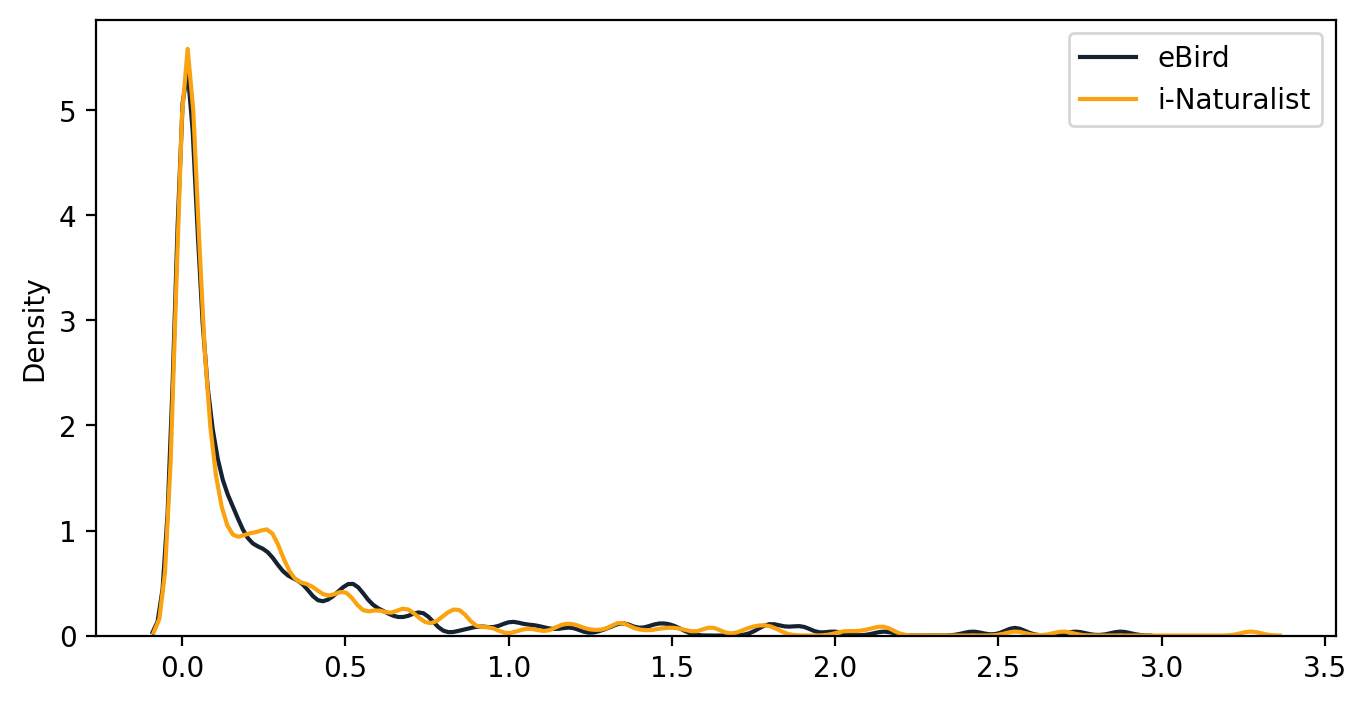

In [216]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.kdeplot(eda_ebird.values, ax=ax, label='eBird', color='#142231', bw_adjust=0.2)
sns.kdeplot(eda_inat1.values, ax=ax, label='i-Naturalist', color='#FBA210', bw_adjust=0.2)
ax.legend()


In [222]:
eda_diff = eda_ebird.sort_index() - eda_inat1.sort_index()

In [224]:
eda_diff.describe()

count    3.520000e+02
mean    -1.009294e-17
std      2.587908e-01
min     -1.470059e+00
25%     -3.255552e-02
50%     -1.088524e-03
75%      3.080370e-02
max      1.195224e+00
dtype: float64

In [226]:
import numpy as np

In [228]:
eda_diff_abs = np.abs(eda_diff)

In [229]:
eda_diff_abs.sort_values(ascending=False)

COMMON NAME
Red-tailed Hawk             1.470059
Wild Turkey                 1.396315
Neotropic Cormorant         1.342063
American Coot               1.272878
European Starling           1.195224
                              ...   
Rough-legged Hawk           0.000107
Great Crested Flycatcher    0.000087
Swamp Sparrow               0.000086
Least Flycatcher            0.000069
Blue Jay                    0.000009
Length: 352, dtype: float64

In [231]:
eda_diff.sort_values()

COMMON NAME
Red-tailed Hawk       -1.470059
Wild Turkey           -1.396315
Neotropic Cormorant   -1.342063
American Coot         -1.272878
Great Blue Heron      -1.020892
                         ...   
Turkey Vulture         0.799029
Mourning Dove          0.963545
Common Raven           0.994793
House Finch            1.060527
European Starling      1.195224
Length: 352, dtype: float64